## Image denoising

In [1]:
from skimage import io
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np
from scipy.fft import fft2, fftshift, ifft2
from skimage import img_as_float
from skimage import filters

In [123]:
tig50 = img_as_float(io.imread('0014n.png', as_gray = True))

In [124]:
tig_org = io.imread('0014.png', as_gray=True)

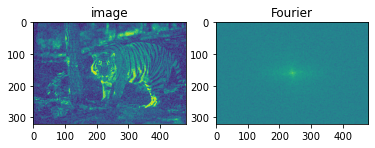

In [4]:
imfft = fftshift(fft2(image))
imm = np.log(np.abs(imfft))
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(image)
t = ax.set_title('image')
ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(imm)
t = ax.set_title('Fourier')

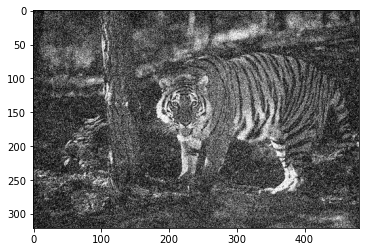

In [93]:
plt.imshow(image, cmap='gray')

In [165]:
from scipy import fftpack

ft_im = fftshift(fft2(image))

keep_fraction = 0.55
image_fft2 = ft_im.copy()
r, c = image_fft2.shape
image_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
image_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

<Figure size 432x288 with 0 Axes>

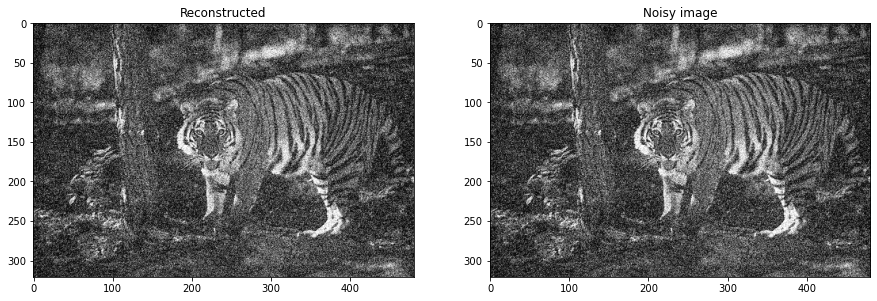

In [166]:
#Step 3
image_new = np.abs(fftpack.ifft2(image_fft2))

plt.figure()

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(image_new, cmap="gray")
ax1.set_title('Reconstructed');

ax3.imshow(image, cmap="gray")
ax3.set_title('Noisy image');

#plt.imshow(image_new, cmap ='gray')
#plt.title('Reconstructed Image')

In [5]:
ii = np.abs(ifft2(imfft))

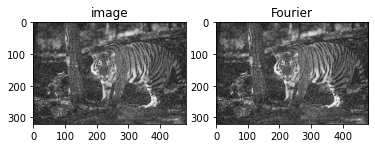

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
p = plt.imshow(image, cmap='gray')
t = ax.set_title('image')
ax = fig.add_subplot(1, 2, 2)
p = plt.imshow(ii, cmap = 'gray')
t = ax.set_title('Fourier')

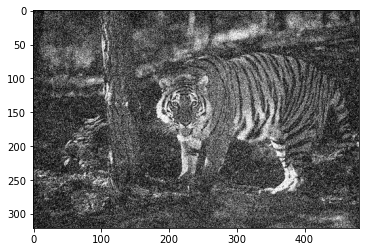

In [7]:
plt.imshow(image, cmap = 'gray')

In [8]:
image.shape, image.dtype


((321, 481), dtype('float64'))

In [98]:
M,N = image.shape

Text(0.5, 1.0, 'Original Noisy Image')

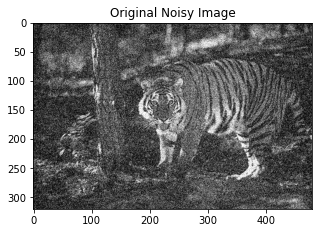

In [10]:
f, ax = plt.subplots(figsize=(5,5))
ax.imshow(image,cmap = "gray")
ax.set_title('Original Noisy Image')

In [11]:
#Return multidimensional discrete Fourier transform.
F = fftpack.fftn(image) 
F_magnitude = np.abs(F)   #absolute value of F

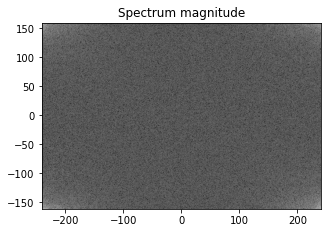

In [12]:
f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [13]:

#shifting 0 frequency component
F_magnitude = fftpack.fftshift(F_magnitude)

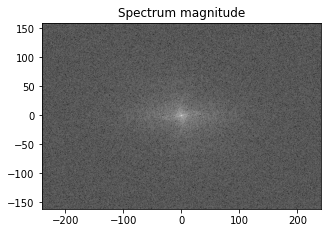

In [14]:

f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [15]:
# Set block around center of spectrum to zero
K = 25
F_magnitude[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0

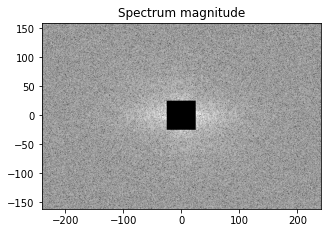

In [16]:
f, ax = plt.subplots(figsize=(5,5))

ax.imshow(np.log(1 + F_magnitude), cmap='gray',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
ax.set_title('Spectrum magnitude');

In [17]:

# Find all peaks lower than the 98th percentile
peaks = F_magnitude < np.percentile(F_magnitude, 98) #for 98 percentile
peaks1 = F_magnitude < np.percentile(F_magnitude, 100) #for 100 percentile

# Shift the peaks back to align with the original spectrum
peaks = fftpack.ifftshift(peaks) #for 98 percentile
peaks1 = fftpack.ifftshift(peaks1) # for 100 percentile

Text(0.5, 1.0, 'Spectrum after suppression(100 %ile)')

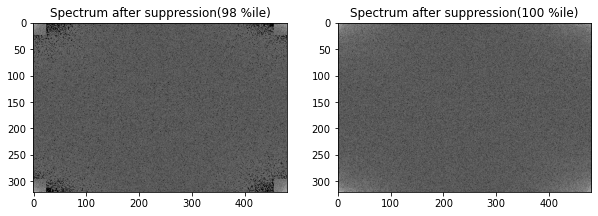

In [18]:
# Make a copy of the original (complex) spectrum
F_dim = F.copy()  # for 98 percentile
F_dim1 = F.copy() #for 100 percentile

# Set those peak coefficients to zero
F_dim = F_dim * peaks.astype(int) # for 98 percentile
F_dim1 = F_dim1 * peaks1.astype(int) #for 100 percentile

f, (ax0, ax2)= plt.subplots(1, 2, figsize=(10,10))
ax0.imshow(np.log10(1 + np.abs(F_dim)), cmap='gray')
ax0.set_title('Spectrum after suppression(98 %ile)')

ax2.imshow(np.log10(1 + np.abs(F_dim1)), cmap='gray')
ax2.set_title('Spectrum after suppression(100 %ile)')

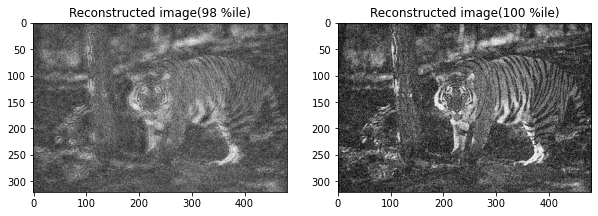

In [19]:
# Do the inverse Fourier transform to get back to an image.
# Since we started with a real image, we only look at the real part of
# the output.
image_filtered = np.real(fftpack.ifft2(F_dim)) #for 98 percentile
image_filtered1 = np.real(fftpack.ifft2(F_dim1)) #for 100 percentile

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,10))
ax1.imshow(image_filtered, cmap="gray")
ax1.set_title('Reconstructed image(98 %ile)');

ax3.imshow(image_filtered1, cmap="gray")
ax3.set_title('Reconstructed image(100 %ile)');

In [20]:
from skimage.color import gray2rgb


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


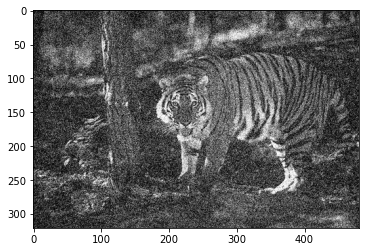

In [21]:
plt.imshow(gray2rgb(image_filtered1))

In [62]:
image[320,480]

0.037857254901960784

In [64]:
image = io.imread('0014n.png')

In [86]:
# median filter

image_new = filters.median(image, np.ones((3, 3)))

plt.figure()

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(image_new, cmap="gray")
ax1.set_title('Reconstructed');

ax3.imshow(image, cmap="gray")
ax3.set_title('Noisy image');

RuntimeError: filter footprint array has incorrect shape.

In [ ]:
# median filter

image_new = filters.median(image, np.ones((3, 3)))

plt.figure()

f, (ax1, ax3) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(image_new, cmap="gray")
ax1.set_title('Reconstructed');

ax3.imshow(image, cmap="gray")
ax3.set_title('Noisy image');

In [188]:
# mean filter



In [190]:
# Wavelet filter



In [ ]:
# Low pass filter



In [107]:
# NLM FILTER

from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma

In [61]:
image = img_as_float(io.imread('0014n.png'))

In [59]:
image_org = img_as_float(io.imread('0014.png'))

In [196]:
## Fast NLM without sigma (without patch)

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=0.75 * sigma_est, fast_mode=True)


# with h=0.75 , SSIM value is : 0.7634322241584779
#               MSE value is : 0.0037691530047628302

In [249]:
## Fast NLM with sigma      without patch

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=0.6 * sigma_est, sigma=sigma_est/1.2, fast_mode=True)


# sigma/1.2
# SSIM value is : 0.7769441081013282
# MSE value is : 0.0034319102364797354

In [300]:
## SLOW NLM without SIGMA   without patch

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=0.95 * sigma_est,  fast_mode=False)


# h = 0.95 

# SSIM : 0.7643

In [283]:
## Slow NLM with sigma         without patch

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=0.6 * sigma_est, sigma=sigma_est/0.94, fast_mode=False)


# SIGMA/0.93

# SSIM value is : 0.7768041021642346
# MSE value is : 0.0033497571534283903

### adding patch

In [370]:
patch_kw = dict(patch_size=7,      # 5x5 patches
                patch_distance=6)  # 13x13 search area

In [380]:
## Fast NLM with sigma with patch

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=0.6 * sigma_est, sigma=sigma_est/1.05, fast_mode=True, **patch_kw)


# h =0.6
# SSIM value is : 0.7761094359597812
# MSE value is : 0.0033005187073340413

In [386]:
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6)  # 13x13 search area

In [395]:
## Fast NLM WITHOUT sigma with patch

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=0.95 * sigma_est, fast_mode=True, **patch_kw)


# SSIM = 0.756


In [435]:
## Slow NLM with sigma with patch

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=1.1 * sigma_est, sigma=sigma_est/1.05, fast_mode=False, **patch_kw)


# h = 1.1
# SSIM = 0.756


In [380]:
## Fast NLM with sigma with patch

sigma_est = np.mean(estimate_sigma(tig50, multichannel=False))
imd = denoise_nl_means(tig50, h=0.6 * sigma_est, sigma=sigma_est/1.05, fast_mode=True, **patch_kw)


# h =0.6


<Figure size 432x288 with 0 Axes>

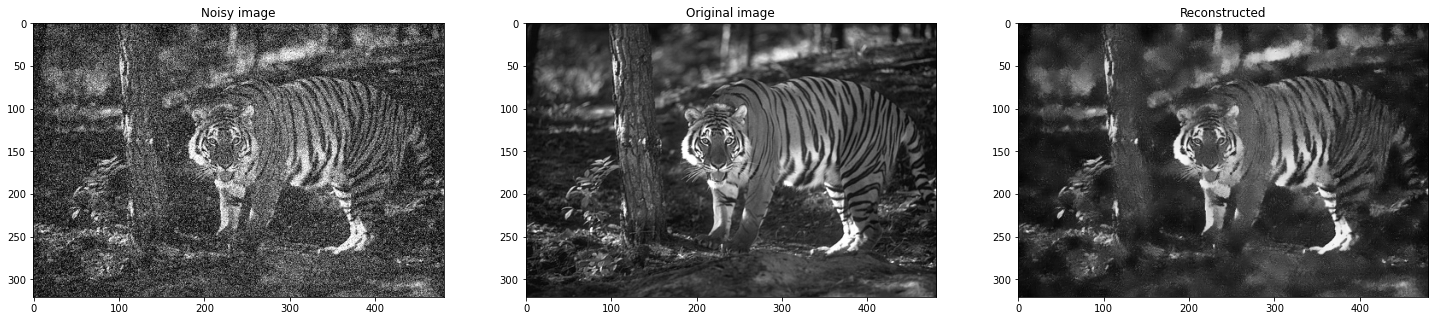

In [437]:
plt.figure()

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(25,25))

ax1.imshow(image, cmap="gray")
ax1.set_title('Noisy image');

ax2.imshow(image_org, cmap = 'gray')
ax2.set_title('Original image');

ax3.imshow(imd, cmap="gray")
ax3.set_title('Reconstructed');





In [419]:
yo = imd
print(yo)

[[0.16514495 0.16214089 0.1469262  ... 0.17059884 0.1396679  0.151408  ]
 [0.15498112 0.15974693 0.15324461 ... 0.14767051 0.14747581 0.16502545]
 [0.16961555 0.14242092 0.15386968 ... 0.14690606 0.1640335  0.15811473]
 ...
 [0.15909797 0.19228195 0.19082178 ... 0.2045113  0.22646353 0.20248333]
 [0.15556543 0.17479547 0.16228213 ... 0.20766321 0.2399667  0.22786893]
 [0.15402735 0.15779038 0.14315871 ... 0.25160926 0.22843227 0.21175089]]


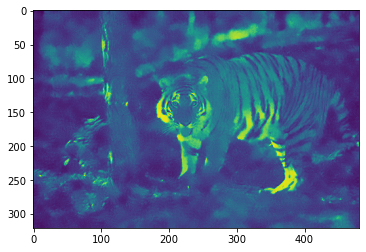

In [410]:
plt.imshow(yo)

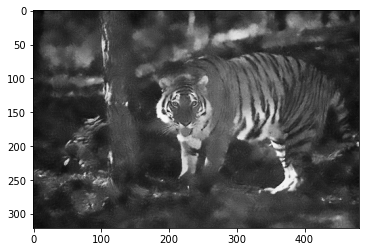

In [411]:
plt.imshow(imd, cmap='gray')

<ipython-input-96-8fe8757b4c32>:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = color.rgb2gray(image)


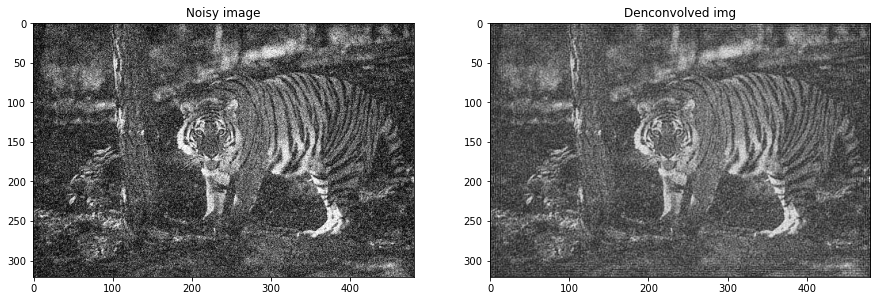

In [96]:
# Wiener filter

from skimage import color, data, restoration
img = color.rgb2gray(image)

from scipy.signal import convolve2d
psf = np.ones((3,3)) / 9
img = convolve2d(img, psf, 'same')
img += 0.01 * img.std() * np.random.standard_normal(img.shape)
deconvolved_img,_ = restoration.unsupervised_wiener(img, psf, clip=False)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))

ax1.imshow(image, cmap="gray")
ax1.set_title('Noisy image');

ax2.imshow(deconvolved_img, cmap = 'gray')
ax2.set_title('Denconvolved img');


In [79]:
from skimage.filters import gaussian, laplace, rank

img2 = gaussian(image, sigma=2)
img3 = gaussian(image, sigma=3)
img5 = gaussian(image, sigma=5)

<ipython-input-79-cd11f70adb83>:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img2 = gaussian(image, sigma=2)
<ipython-input-79-cd11f70adb83>:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img3 = gaussian(image, sigma=3)
<ipython-input-79-cd11f70adb83>:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img5 = gaussian(image, sigma=5)


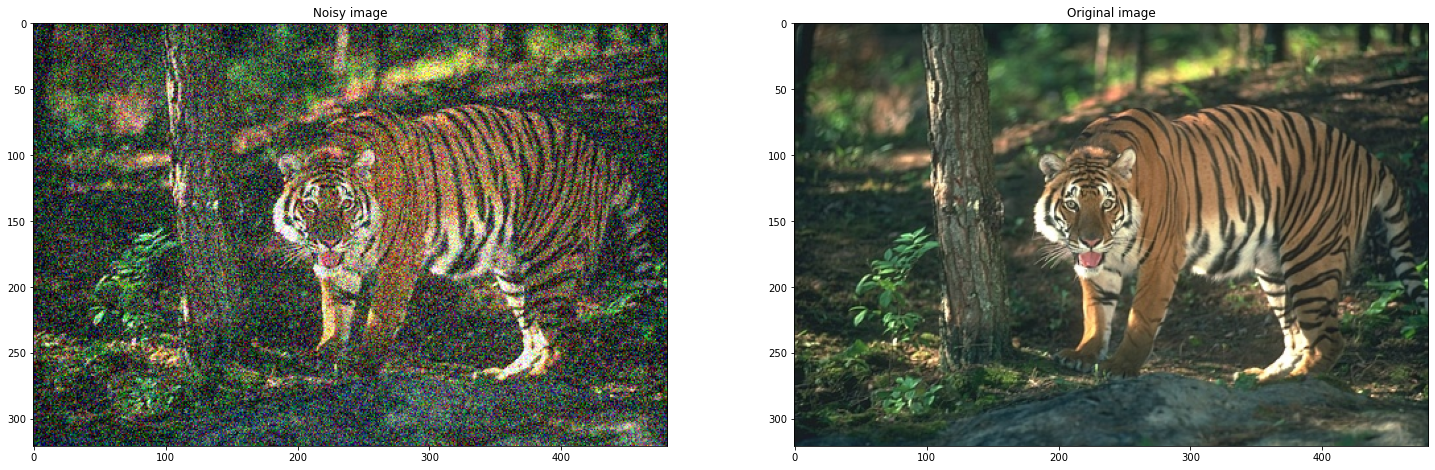

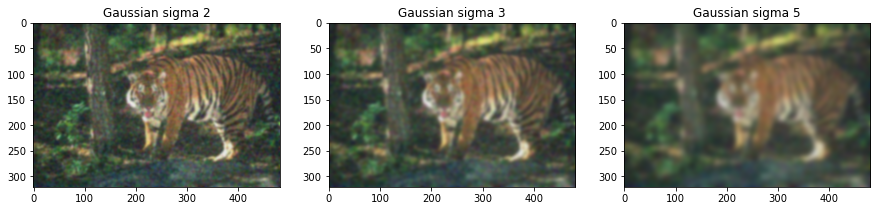

In [80]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,25))

ax1.imshow(image, cmap="gray")
ax1.set_title('Noisy image');

ax2.imshow(image_org)
ax2.set_title('Original image');

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,15))

ax1.imshow(img2, cmap="gray")
ax1.set_title('Gaussian sigma 2');

ax2.imshow(img3)
ax2.set_title('Gaussian sigma 3');

ax3.imshow(img5, cmap="gray")
ax3.set_title('Gaussian sigma 5');

In [81]:
imf = fftshift(fft2(img2))

In [84]:
imf = np.log(np.abs(imf))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


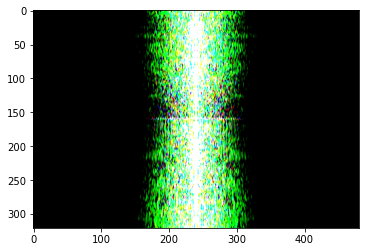

In [85]:
plt.imshow(imf)

In [87]:
imgg = ifft2(imf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


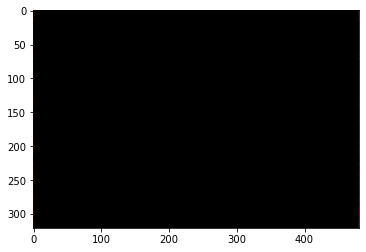

In [90]:
plt.imshow(np.log(np.abs(imgg)))

In [130]:
tig50.shape

(321, 481)

Estimated Gaussian noise standard deviation = 0.13719715654412498


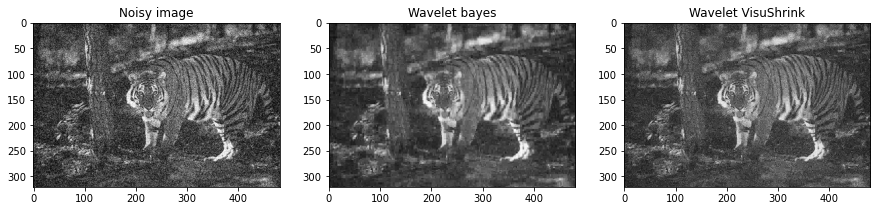

In [139]:
## Wavelet denoising

from skimage.restoration import denoise_wavelet, estimate_sigma

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(tig50, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

im_bayes = denoise_wavelet(tig50, convert2ycbcr=False,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
im_visushrink = denoise_wavelet(tig50, convert2ycbcr=False,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est/8, rescale_sigma=True)


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,15))

ax1.imshow(tig50, cmap="gray")
ax1.set_title('Noisy image');

ax2.imshow(im_bayes, cmap='gray')
ax2.set_title('Wavelet bayes');


ax3.imshow(im_visushrink, cmap='gray')
ax3.set_title('Wavelet VisuShrink');

## Comparing

In [479]:
## mean squre error

sum = 0.0
x=0
y=0

for x in range(M):
    
    for y in range(N):
        
        difference = (im_bayes[x,y] - tig_org[x,y])
        sum = sum + difference*difference
        y+=1
    x+=1

mse = sum /(M*N)
print("The mean square error is \n",mse) 


## SSIM 

from skimage.metrics import structural_similarity as ssim, mean_squared_error as mse


mse_value = mse(imd, tig_org)
ssim_value = ssim(imd, tig_org)

print('SSIM value is :', ssim_value)
print('MSE value is :', mse_value)

The mean square error is 
 0.004557764368988697
SSIM value is : 0.7557439574254173
MSE value is : 0.004324373608705412


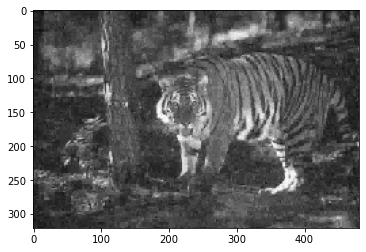

In [445]:

plt.imshow(im_bayes, cmap='gray')

In [477]:
sigma_est = np.mean(estimate_sigma(im_bayes, multichannel=False))
imd = denoise_nl_means(im_bayes, h=0.6 * sigma_est, sigma=sigma_est/0.11, fast_mode=True)


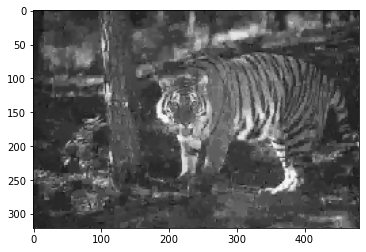

In [478]:
plt.imshow(imd, cmap='gray')